In [14]:
import pandas as pd

from WordEmbedding import WordEmbeddingFromScratch
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch
import lightning as L
import torch.nn as nn


In [15]:
modelFromScratch = WordEmbeddingFromScratch()

print("Before optimization, the parameters are:")
for name, param in modelFromScratch.named_parameters():
    print(name, param.data)

Before optimization, the parameters are:
input1_w1 tensor(-0.1115)
input1_w2 tensor(0.3298)
input2_w1 tensor(0.0690)
input2_w2 tensor(0.4775)
input3_w1 tensor(-0.2572)
input3_w2 tensor(-0.2154)
input4_w1 tensor(-0.3880)
input4_w2 tensor(-0.2690)
output1_w1 tensor(0.4387)
output1_w2 tensor(0.3261)
output2_w1 tensor(0.0019)
output2_w2 tensor(-0.3343)
output3_w1 tensor(-0.0054)
output3_w2 tensor(0.2312)
output4_w1 tensor(-0.4094)
output4_w2 tensor(0.4361)


In [16]:
data = {
    "w1": [modelFromScratch.input1_w1.item(),
           modelFromScratch.input2_w1.item(),
           modelFromScratch.input3_w1.item(),
           modelFromScratch.input4_w1.item(),],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(),
           modelFromScratch.input3_w2.item(),
           modelFromScratch.input4_w2.item(),],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}

In [17]:
inputs = torch.tensor([[1.,0.,0.,0.],
                       [0.,1.,0.,0.],
                       [0.,0.,1.,0.],
                       [0.,0.,0.,1.]])

labels = torch.tensor([[0.,1.,0.,0.],
                       [0.,0.,1.,0.],
                       [0.,0.,0.,1.],
                       [0.,1.,0.,0.]])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [18]:
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.111489,0.329771,Troll2,input1
1,0.068962,0.477473,is,input2
2,-0.257201,-0.215424,great,input3
3,-0.388038,-0.268969,Gymkata,input4


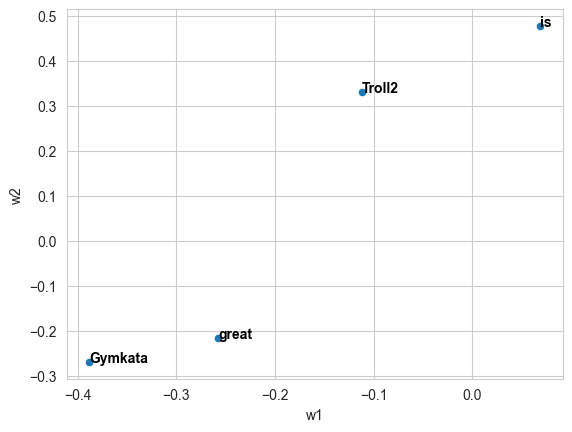

In [19]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.text(df.w1[3], df.w2[3], df.token[3],
        horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.show()

In [20]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelFromScratch, train_dataloaders=dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
C:\Users\admin\.conda\envs\pytorch_learning\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
C:\Users\admin\.conda\envs\pytorch_learning\lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (4) is smaller than the

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [21]:
data = {
    "w1": [modelFromScratch.input1_w1.item(),
           modelFromScratch.input2_w1.item(),
           modelFromScratch.input3_w1.item(),
           modelFromScratch.input4_w1.item(),],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(),
           modelFromScratch.input3_w2.item(),
           modelFromScratch.input4_w2.item(),],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-1.535605,-2.023680,Troll2,input1
1,2.124276,1.980828,is,input2
2,-2.124045,1.787797,great,input3
3,-1.851225,-2.252706,Gymkata,input4


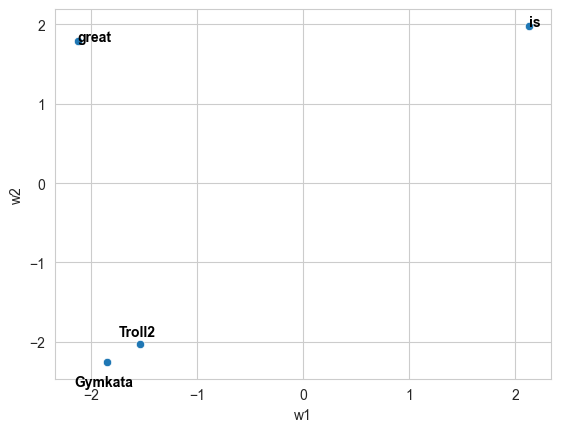

In [22]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0]-0.2, df.w2[0]+0.1, df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.text(df.w1[3]-0.3, df.w2[3]-0.3, df.token[3],
        horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold',)

plt.show()

In [23]:
softmax = nn.Softmax(dim=0)
print(torch.round(softmax(modelFromScratch(torch.tensor([[1.,0. ,0.,0.]]))),decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)


In [24]:
print(torch.round(softmax(modelFromScratch(torch.tensor([[0.,1. ,0.,0.]]))),decimals=2))

tensor([0., 0., 1., 0.], grad_fn=<RoundBackward1>)


In [25]:
print(torch.round(softmax(modelFromScratch(torch.tensor([[0.,0. ,1.,0.]]))),decimals=2))

tensor([0., 0., 0., 1.], grad_fn=<RoundBackward1>)


In [26]:
print(torch.round(softmax(modelFromScratch(torch.tensor([[0.,0. ,0.,1.]]))),decimals=2))

tensor([0., 1., 0., 0.], grad_fn=<RoundBackward1>)
